# Atividade 2 (0,5 ponto)
## Descrição

- Analise diferentes filtros de imagem para uma imagem do seu problema. 

- Aplique os filtros de média, mediana, gaussiano e bilateral, utilizando 3 tamanhos de janela.

- Para os filtros gaussiano e bilateral, teste diferentes variações nos parâmetros internos do filtro (no mínimo 3).
- Ao final, identifique que tipo de filtro foi melhor para o seu problema e justifique.

Para essa atividade, você pode usar as funções prontas da biblioteca do opencv.
Mas fique a vontade para implementar da forma que quiser.

Encare essa atividade como uma etapa inicial de pré-processamento para o seu projeto da disciplina.

### Importando e configurando ambiente

In [732]:
import cv2
import numpy as np

import pylab as plt
%matplotlib inline

### Imagem Original


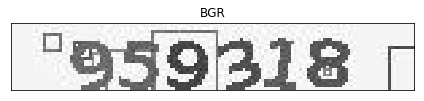

In [922]:
image = cv2.imread('../db_images/jpeg/captcha.jpeg')
plt.title("BGR")
plt.xticks([]), plt.yticks([])
plt.imshow(image)

plt.tight_layout()

In [923]:
d = {}

### Usando filtro Blur

In [924]:
d['blur'] = []

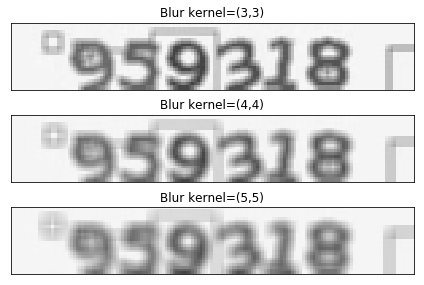

In [925]:
plt.figure()

blur = cv2.blur(image, (3,3))
plt.subplot(311)
plt.title('Blur kernel=(3,3)')
plt.xticks([]), plt.yticks([])
plt.imshow(blur)
d['blur'].append(blur)

blur = cv2.blur(image, (4,4))
plt.subplot(312)
plt.title('Blur kernel=(4,4)')
plt.xticks([]), plt.yticks([])
plt.imshow(blur)
d['blur'].append(blur)

blur = cv2.blur(image, (5,5))
plt.subplot(313)
plt.title('Blur kernel=(5,5)')
plt.xticks([]), plt.yticks([])
plt.imshow(blur)
d['blur'].append(blur)

plt.tight_layout()

### Usando filtro GassianBlur

In [926]:
d['gaussian_blur'] = []

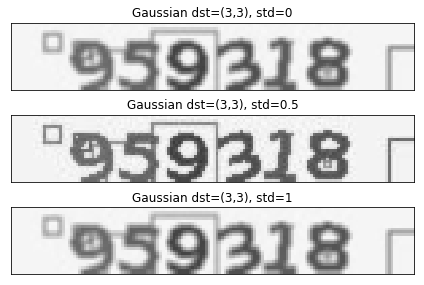

In [927]:
plt.figure()

gaussian = cv2.GaussianBlur(image,(3,3), 0)
plt.subplot(311)
plt.title('Gaussian dst=(3,3), std=0')
plt.xticks([]), plt.yticks([])
plt.imshow(gaussian)
d['gaussian_blur'].append(gaussian)

gaussian = cv2.GaussianBlur(image,(3,3), 0.5)
plt.subplot(312)
plt.title('Gaussian dst=(3,3), std=0.5')
plt.xticks([]), plt.yticks([])
plt.imshow(gaussian)
d['gaussian_blur'].append(gaussian)

gaussian = cv2.GaussianBlur(image,(3,3), 1)
plt.subplot(313)
plt.title('Gaussian dst=(3,3), std=1')
plt.xticks([]), plt.yticks([])
plt.imshow(gaussian)
d['gaussian_blur'].append(gaussian)

plt.tight_layout()

### Usando filtro median

In [928]:
d['media'] = []

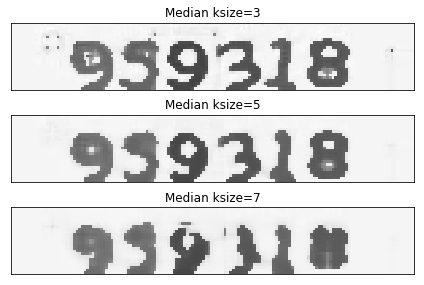

In [929]:
plt.figure()

median = cv2.medianBlur(image, 3)
plt.subplot(311)
plt.title('Median ksize=3')
plt.xticks([]), plt.yticks([])
plt.imshow(median)
d['media'].append(median)

median = cv2.medianBlur(image, 5)
plt.subplot(312)
plt.title('Median ksize=5')
plt.xticks([]), plt.yticks([])
plt.imshow(median)
d['media'].append(median)

median = cv2.medianBlur(image, 7)
plt.subplot(313)
plt.title('Median ksize=7')
plt.xticks([]), plt.yticks([])
plt.imshow(median)
d['media'].append(median)

plt.tight_layout()

### Usando filtro bilateral

In [930]:
d['bilateral_filter'] = []

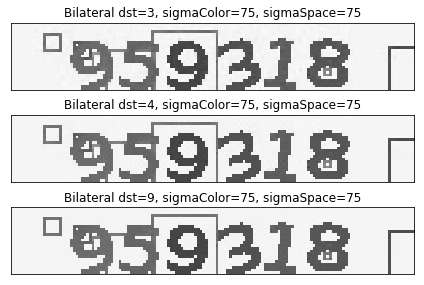

In [931]:
plt.figure()

bilateral = cv2.bilateralFilter(image, 3, 75, 75)
plt.subplot(311)
plt.title('Bilateral dst=3, sigmaColor=75, sigmaSpace=75')
plt.xticks([]), plt.yticks([])
plt.imshow(bilateral)
d['bilateral_filter'].append(bilateral)

bilateral = cv2.bilateralFilter(image, 4, 75, 75)
plt.subplot(312)
plt.title('Bilateral dst=4, sigmaColor=75, sigmaSpace=75')
plt.xticks([]), plt.yticks([])
plt.imshow(bilateral)
d['bilateral_filter'].append(bilateral)

bilateral = cv2.bilateralFilter(image, 9, 75, 75)
plt.subplot(313)
plt.title('Bilateral dst=9, sigmaColor=75, sigmaSpace=75')
plt.xticks([]), plt.yticks([])
plt.imshow(bilateral)
d['bilateral_filter'].append(bilateral)

plt.tight_layout()

### Usando filtro filter2d

In [932]:
d['filter2d'] = []

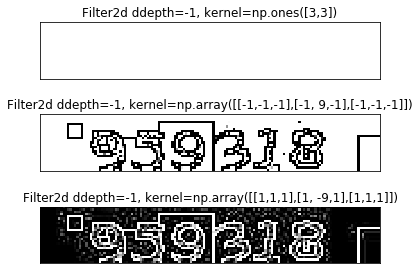

In [1111]:
plt.figure()

kernel = np.ones([3,3])
filter2d = cv2.filter2D(image, -1, kernel)
plt.subplot(311)
plt.title('Filter2d ddepth=-1, kernel=np.ones([3,3])')
plt.xticks([]), plt.yticks([])
plt.imshow(filter2d)
d['filter2d'].append(filter2d)

kernel = np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])*10
filter2d = cv2.filter2D(image, -1, kernel)
plt.subplot(312)
plt.title('Filter2d ddepth=-1, kernel=np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])')
plt.xticks([]), plt.yticks([])
plt.imshow(filter2d)
d['filter2d'].append(filter2d)

kernel = np.array([[1,1,1],[1, -8,1],[1,1,1]])
filter2d = cv2.filter2D(image, -1, kernel)
plt.subplot(313)
plt.title('Filter2d ddepth=-1, kernel=np.array([[1,1,1],[1, -9,1],[1,1,1]])')
plt.xticks([]), plt.yticks([])
plt.imshow(filter2d)
d['filter2d'].append(filter2d)

plt.tight_layout()

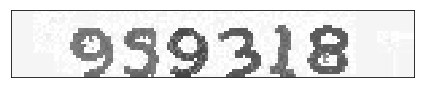

In [1351]:
img = cv2.bitwise_or(image, d['media'][1], d['filter2d'][2])
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.tight_layout()

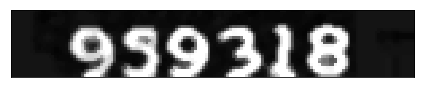

In [1352]:
img = cv2.GaussianBlur(img,(3,3), 0)
plt.xticks([]), plt.yticks([])
plt.imshow(gaussian)

plt.tight_layout()

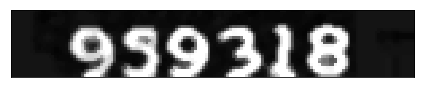

In [1353]:
median = cv2.medianBlur(cv2.add(cv2.bitwise_not(img),cv2.bitwise_not(img)), 3)
plt.xticks([]), plt.yticks([])
plt.imshow(median)

plt.tight_layout()

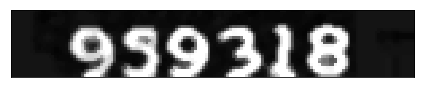

In [1354]:
gaussian = cv2.GaussianBlur(median,(5,5), 0.1)
plt.xticks([]), plt.yticks([])
plt.imshow(gaussian)

plt.tight_layout()

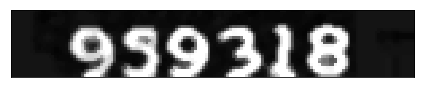

In [1355]:
gaussian = cv2.GaussianBlur(gaussian,(5,5), 0.1)
plt.xticks([]), plt.yticks([])
plt.imshow(gaussian)

plt.tight_layout()

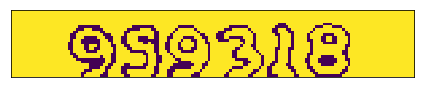

In [1356]:
lower = np.array([50,50,50])
upper = np.array([205,255,255])

mask = cv2.inRange(gaussian, lower, upper)

plt.xticks([]), plt.yticks([])
plt.imshow(cv2.bitwise_not(mask))
plt.tight_layout()

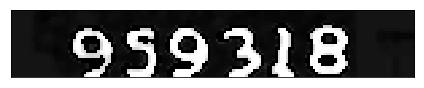

In [1357]:
img = cv2.bitwise_and(gaussian, gaussian, mask=cv2.bitwise_not(mask))
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.tight_layout()

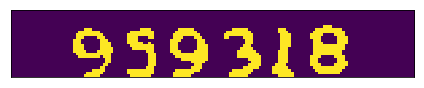

In [1358]:
lower = np.array([200,200,200])
upper = np.array([255,255,255])

mask = cv2.inRange(img, lower, upper)

plt.xticks([]), plt.yticks([])
plt.imshow(mask)
plt.tight_layout()

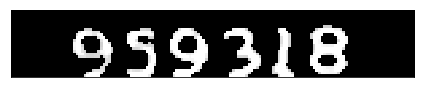

In [1359]:
img = cv2.bitwise_and(gaussian, gaussian, mask=mask)
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.tight_layout()